In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

##### Load cifar10 Dataset

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

##### Data pre-processing
Normalize RGB value (0~255) to (0~1)

In [10]:
NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [11]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


##### Network with Functional API

In [13]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(32,32, 3))

x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


##### Compile Model

In [14]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

##### Training Model

In [15]:
model.fit(x_train, y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 175us/sample - loss: 1.8584 - accuracy: 0.3279
Epoch 2/10
50000/50000 [==============================] - 8s 168us/sample - loss: 1.6643 - accuracy: 0.4046
Epoch 3/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.5783 - accuracy: 0.4355
Epoch 4/10
50000/50000 [==============================] - 8s 168us/sample - loss: 1.5310 - accuracy: 0.4533
Epoch 5/10
50000/50000 [==============================] - 8s 161us/sample - loss: 1.4923 - accuracy: 0.4681
Epoch 6/10
50000/50000 [==============================] - 8s 161us/sample - loss: 1.4654 - accuracy: 0.4781
Epoch 7/10
50000/50000 [==============================] - 8s 169us/sample - loss: 1.4373 - accuracy: 0.4873
Epoch 8/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.4144 - accuracy: 0.4947
Epoch 9/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.3932 - accuracy: 0.5047
Epoch

##### Evaluate Model

In [16]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.512298261642456, 0.4674]

##### Accuracy Per Category

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                    'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

##### Make Plot

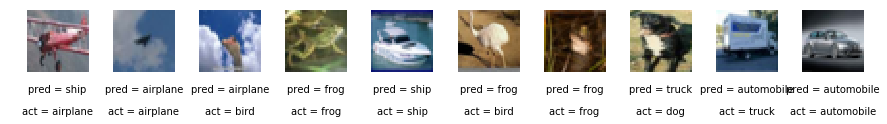

In [21]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = '+str(preds_single[idx]),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]),
           fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)